# Project IART - 2023

This project consists of supervised learning with the following steps:
- 0. Data collection
- 1. Dataset analysis
- 2. Definition of the training and test sets
- 3. Selection, Parameterization and Evaluation of the learning classification algorithms
  - 3.1. Decision Trees
  - 3.2. Neural Networks
  - 3.3. K-NN
  - 3.4. SVM

## 0. Dataset

The dataset used in this project is the [Cancer Dataset](https://www.kaggle.com/datasets/erdemtaha/cancer-data).

The dataset contains 569 instances and 32 attributes. The class distribution is 212 Malignant and 357 Benign.

The dataset is composed of 30 attributes, 10 of them are real and the rest are integers. The attributes are:

The dataset contains 30 attributes, which are as follows:

-   **diagnosis**: This is the target variable (label) and represents the diagnosis of the breast cancer (M=malignant, B=benign).
-   **radius_mean**: This is the mean of distances from the center of the nucleus to points on the perimeter of the tumor.
-   **texture_mean**: This is the standard deviation of gray-scale values in the image.
-   **perimeter_mean**: This is the mean size of the core tumor.
-   **area_mean**: This is the mean area of the tumor.
-   **smoothness_mean**: This is the mean of local variation in radius lengths.
-   **compactness_mean**: This is the mean of perimeter^2 / area - 1.0.
-   **concavity_mean**: This is the mean of severity of concave portions of the contour.
-   **concave points_mean**: This is the mean for number of concave portions of the contour.
-   **symmetry_mean**: This is the mean symmetry of the cell nuclei.
-   **fractal_dimension_mean**: This is the mean fractal dimension of the cell nuclei.
-   **radius_se**: This is the standard error of distances from the center of the nucleus to points on the perimeter of the tumor.
-   **texture_se**: This is the standard error of gray-scale values in the image.
-   **perimeter_se**: This is the standard error of the size of the core tumor.
-   **area_se**: This is the standard error of the area of the tumor.
-   **smoothness_se**: This is the standard error of local variation in radius lengths.
-   **compactness_se**: This is the standard error of perimeter^2 / area - 1.0.
-   **concavity_se**: This is the standard error of severity of concave portions of the contour.
-   **concave points_se**: This is the standard error for number of concave portions of the conour.
-   **symmetry_se**: This is the standard error of symmetry of the cell nuclei.
-   **fractal_dimension_se**: This is the standard error of fractal dimension of the cell nuclei.
-   **radius_worst**: This is the worst or largest mean of distances from the center of the nucleus to points on the perimeter of the tumor.
-   **texture_worst**: This is the worst or largest standard deviation of gray-scale values in the image.
-   **perimeter_worst**: This is the worst or largest size of the core tumor.
-   **area_worst**: This is the worst or largest area of the tumor.
-   **smoothness_worst**: This is the worst or largest local variation in radius lengths.
-   **compactness_worst**: This is the worst or largest perimeter^2 / area - 1.0.
-   **concavity_worst**: This is the worst or largest severity of concave portions of the contour.
-   **concave points_worst**: This is the worst or largest number of concave portions of the contour.
-   **symmetry_worst**: This is the worst or largest symmetry of the cell nuclei.
-   **fractal_dimension_worst**: This is the worst or largest fractal dimension of the cell nuclei.


## 1. Dataset analysis

### 1.1. Importing the libraries

In [1]:
import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

from IPython.display import Image
from subprocess import call

from sklearn.exceptions import ConvergenceWarning

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import sklearn.tree as tree # 1. Decision Tree
from sklearn.neural_network import MLPClassifier # 2. Neural Network
from sklearn.neighbors import KNeighborsClassifier # 3. KNN (K-Nearest Neighbors)
from sklearn.svm import SVC # 4. Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier # 5. Random Forest
from sklearn.linear_model import LogisticRegression # 6. Logistic Regression


from sklearn.metrics import confusion_matrix as conf_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# visualization
from sklearn.manifold import TSNE


from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# data
import seaborn as sns


### 1.2. Importing the dataset

In [2]:
# Load the data
df = pandas.read_csv("dataset.csv")

# Drop uneeded columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Print the first 5 rows of the data
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0         M        17.99         10.38          122.80     1001.0  \
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.11840           0.27760          0.3001              0.14710  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0         0.2419  ...         25.38          17.33           184.60  \
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst   
0      2019.0            0.1622             0.6656           0.7119  \
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### 1.3 Data First Look

In [3]:
# Print the number of rows and columns in the data
print( f'Rows: {df.shape[0]} \nColumns: {df.shape[1]}\n')


# Print the percentage of benign and malignant cases
print(f'Benign: {round(df["diagnosis"].value_counts()[0] / len(df) * 100, 2)}% \nMalignant: {round(df["diagnosis"].value_counts()[1] / len(df) * 100, 2)}%')

df.describe()

Rows: 569 
Columns: 31

Benign: 62.74% 
Malignant: 37.26%


radius_mean  texture_mean  perimeter_mean    area_mean   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst   
count     569.000000              569.000000  ...    569.000000  \
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst   
count     569.000000       569.000000   569.000000        569.000000  \
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst   
count         569.000000       569.000000            569.000000  \
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Let's take a look at the data using a violin plot.

<Figure size 3000x3000 with 0 Axes>

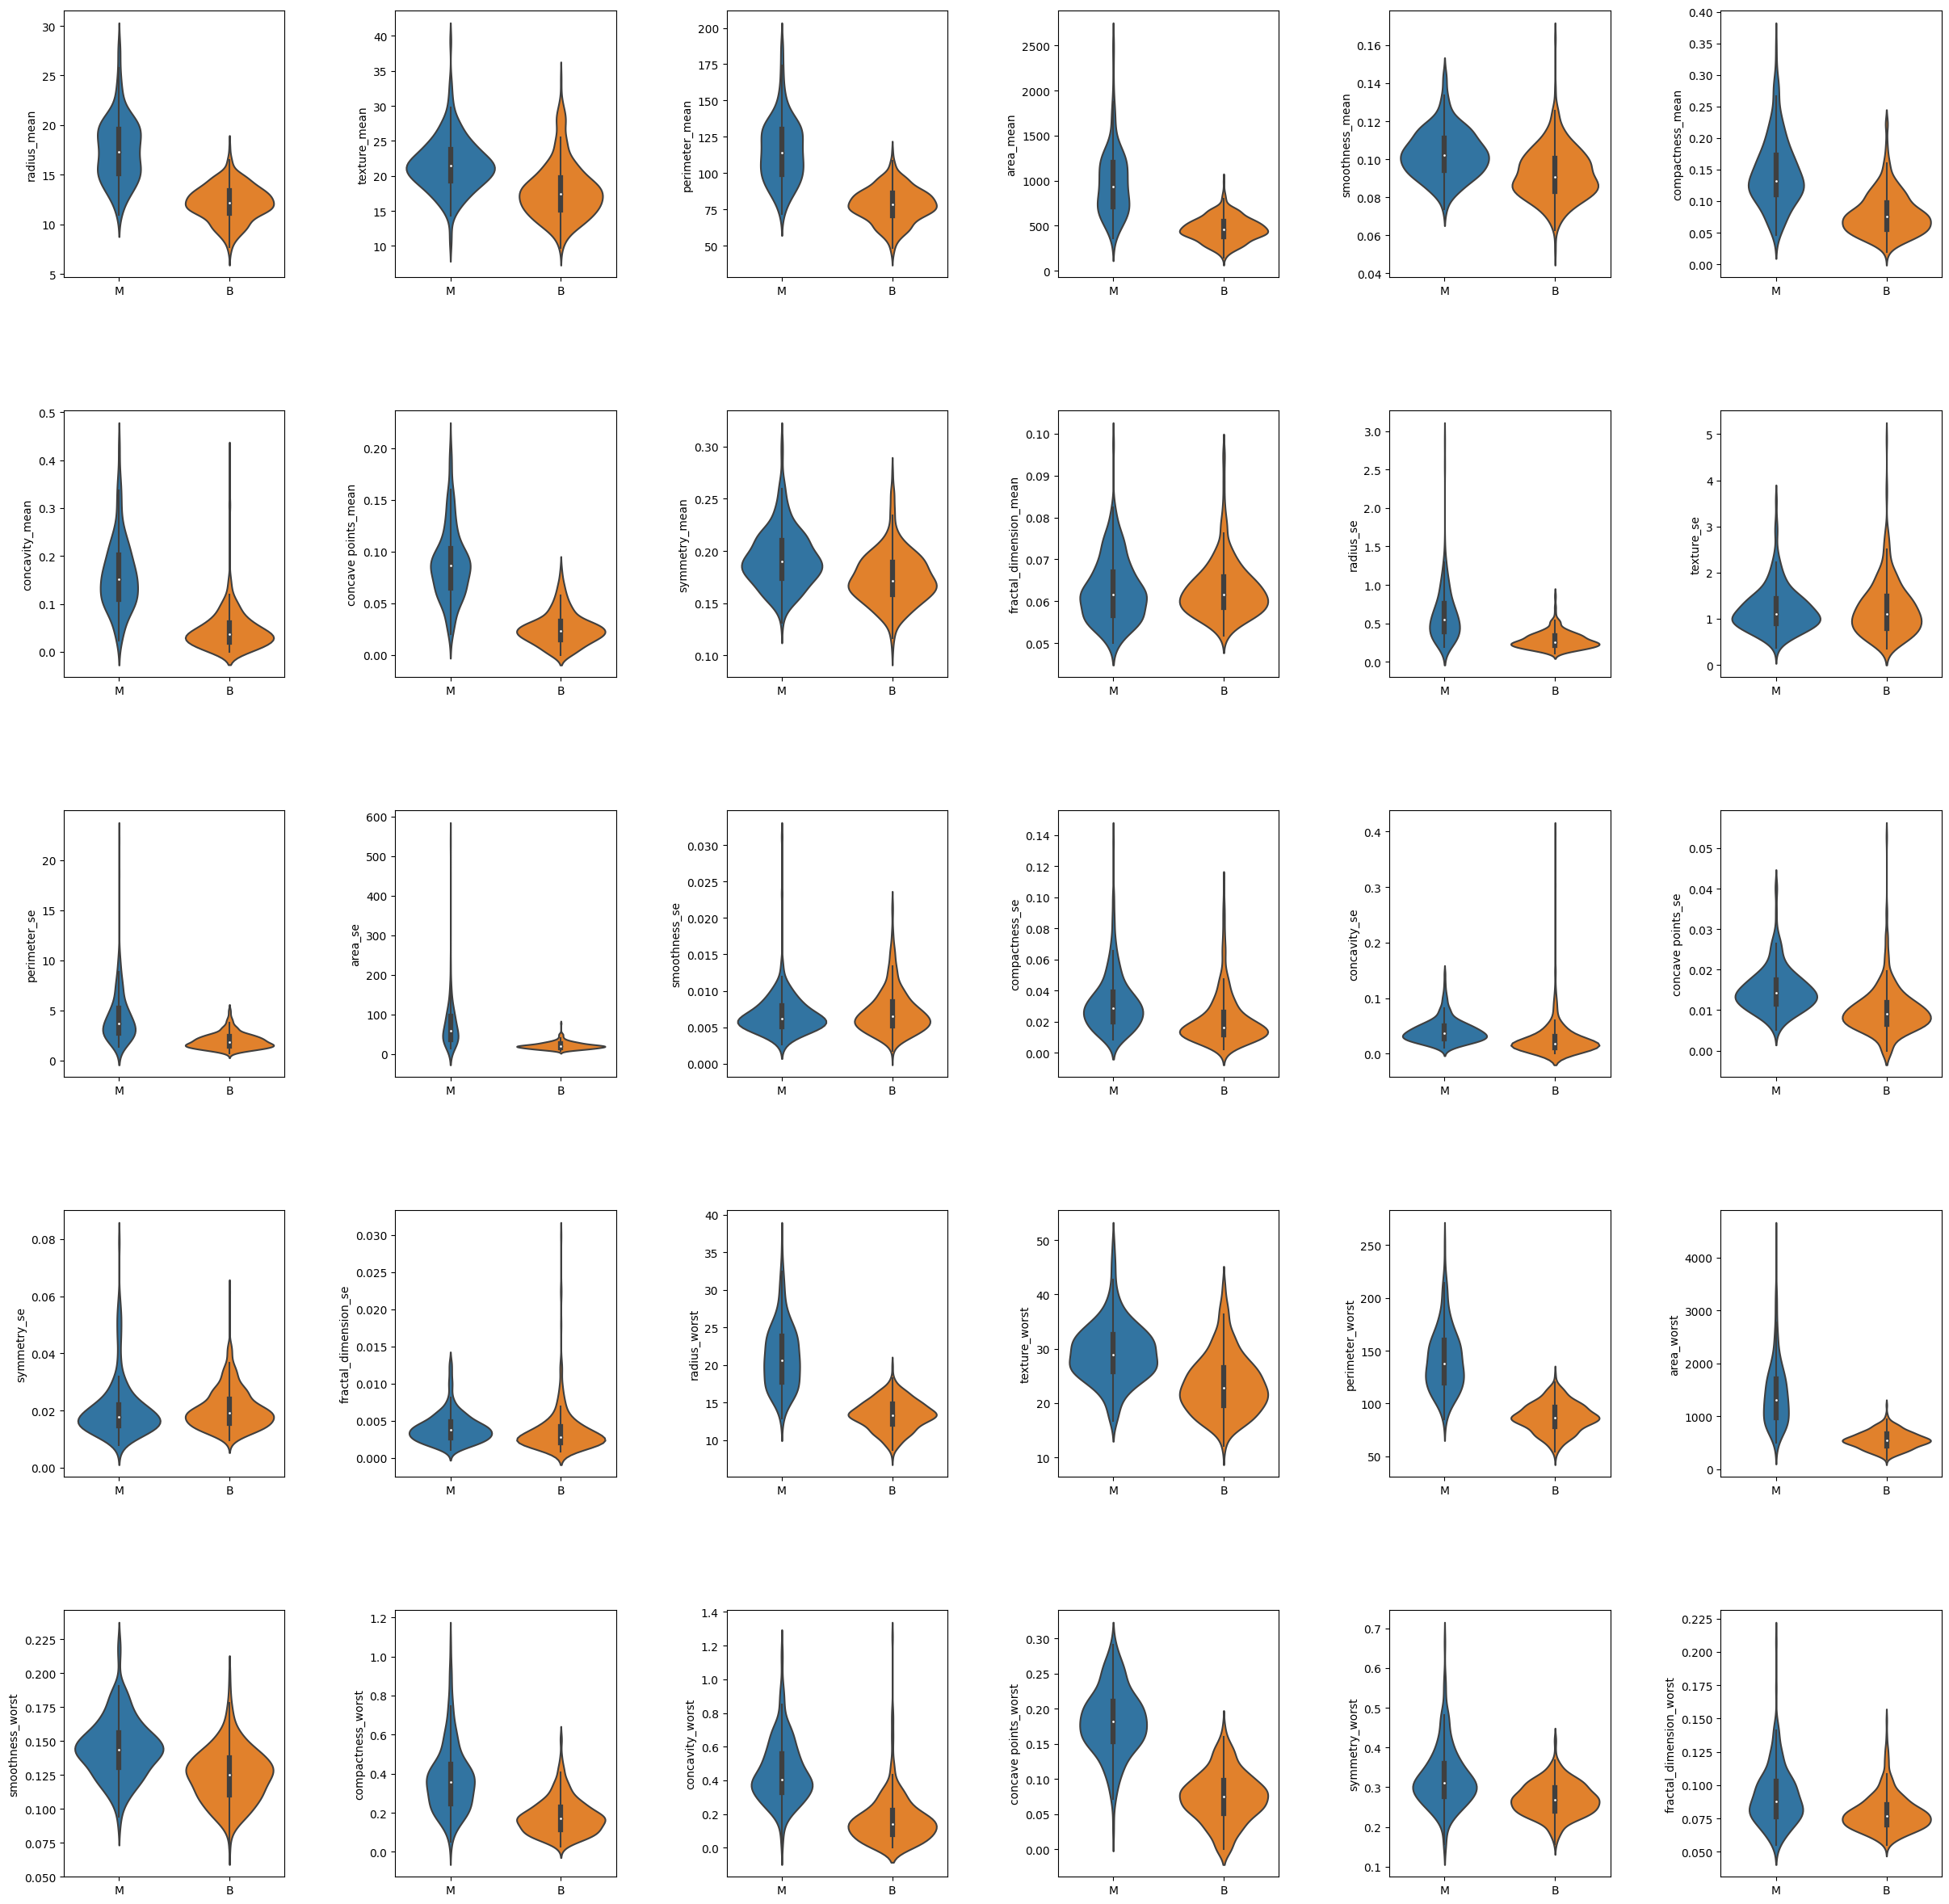

In [4]:
 # Make a violin plot for all the features
def violin_plt():
    plt.figure(figsize=(30, 30))

    fig, axs = plt.subplots(5, 6, figsize=(30, 30))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for column_index, column in enumerate(df.columns):
        if column == 'diagnosis':
            continue
        column_index -= 1
        sb.violinplot(x='diagnosis', y=column, data=df, ax=axs[column_index//6, column_index%6])
        axs[column_index//6, column_index%6].set_xlabel('')
        axs[column_index//6, column_index%6].set_ylabel(column)


    plt.show()

violin_plt()

The violin plot shows the distribution of the data in each class. The black dot represents the mean of the data. The width of the violin represents the standard deviation of the data. The box represents the interquartile range of the data. The whiskers represent the minimum and maximum values of the data.

There are some outliers in the data that can be seen in the extremes of the plots. We'll take care of them later.

### 1.4 Data preprocessing

In [5]:
# See number of Null + NaN + Duplicates
df.isnull().sum().sum() + df.isna().sum().sum() + df.duplicated().sum()

0

#### 1.4.1. Removing outliers

There are no missing or duplicate values in the dataset. However, there are some outliers in the data. Let's treat them.

##### 1.4.1.1 Local Outlier Factor (LOF)

First of all. Let's create a pipeline to treat the outliers. We'll use the Local Outlier Factor (LOF) algorithm to detect the outliers. And StandardScaler to scale the data.

This aproach uses unsupervised learning to detect the outliers. The LOF algorithm calculates the local density deviation of a given data point with respect to its neighbors.
 It considers as outliers the samples that have a substantially lower density than their neighbors.

In [6]:
# Create a pipeline
steps = [('scale', StandardScaler()), 
         ('LOF', LocalOutlierFactor())
]  

X = df.drop(['diagnosis'], axis = 1) ### Drop the target variable ... unsupervised learning should have unlabeled data

# Create the pipeline: pipeline
outliers = Pipeline(steps).fit_predict(X)

We will now add a new column to the dataset that will contain the labels of the outliers. The outliers will be labeled as -1 and the inliers as 1.

We will then have a look at the data frame to check if the column was added.

In [7]:
# Add column
df['outliers'] = outliers
# Look at the top 10
df.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0         M        17.99         10.38          122.80     1001.0  \
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   
8         M        13.00         21.82           87.50      519.8   
9         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.11840           0.27760         0.30010              0.14710  \
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst   
0         0.2419  ...          17.33           184.60      2019.0  \
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   
5         0.2087  ...          23.75           103.40       741.6   
6         0.1794  ...          27.66           153.20      1606.0   
7         0.2196  ...          28.14           110.60       897.0   
8         0.2350  ...          30.73           106.20       739.3   
9         0.2030  ...          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst   
0            0.1622             0.6656           0.7119                0.2654  \
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  outliers  
0          0.4601                  0.11890         1  
1          0.2750                  0.08902         1  
2          0.3613                  0.08758         1  
3          0.6638                  0.17300        -1  
4          0.2364                  0.07678         1  
5          0.3985                  0.12440         1  
6          0.3063                  0.08368         1  
7          0.3196                  0.11510         1  
8          0.4378                  0.10720         1  
9          0.4366                  0.20750        -1  

[10 rows x 32 columns]

Its hard to see the outliers in the violin plot. Let's plot the data using a scatter plot.

First, let's plot the data without the outliers labels. Only the data points.

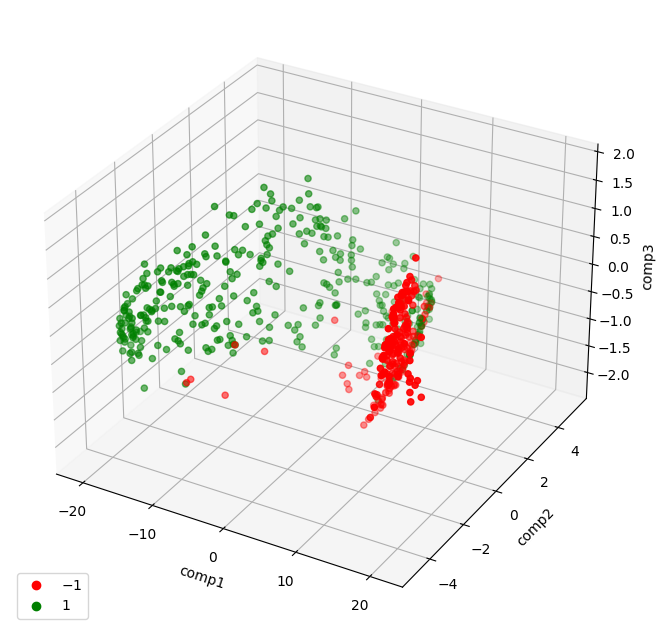

In [8]:
diagnosis_map = {'M': -1, 'B': 1}
from matplotlib.colors import ListedColormap


tsne = TSNE(perplexity=50, n_components=3).fit_transform(X)
tsne = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
tsne['diagnosis'] = df['diagnosis'].map(diagnosis_map)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne['comp1'], tsne['comp2'], tsne['comp3'], c=tsne['diagnosis'], cmap=ListedColormap(['red', 'blue', 'green']))  # create 3D scatter plot

# add labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend(*scatter.legend_elements(), loc='lower left')

plt.show()


We can easily see that some data seems to be off the pattern.

For instance, some red dots are a bit far from the rest of the red dots. But can we be sure that they are outliers? 

This can be do to a series of reasons. For example, the data was not collected correctly or the data is not well classified.

It can also be due to the fact that the data is correct and the outliers are actually rare clinical cases that occured. 

Lets now take a look at the data with the outliers labels.

The red dots represent the outliers and the grey dots represent the inliers.

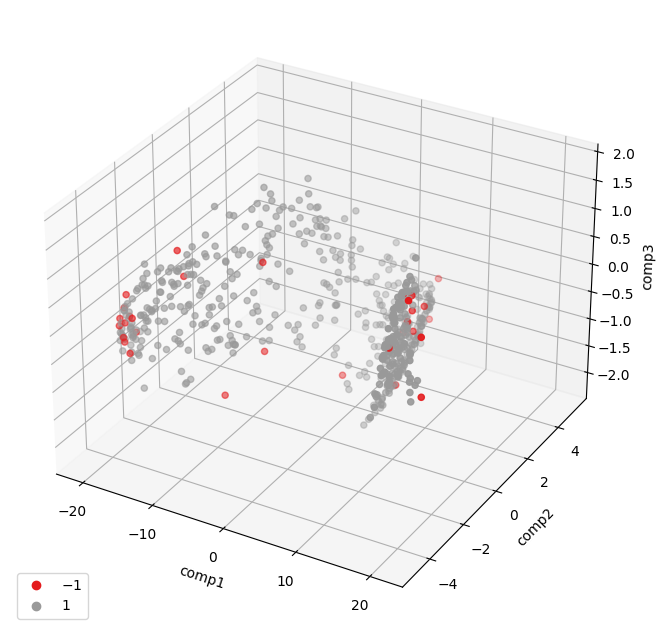

In [9]:
tsne = TSNE(perplexity=50, n_components=3).fit_transform(X) # TODO: é chegar a um valor de perplexity que mostre uma boa separação entre os grupos
tsne = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
tsne['outliers'] = outliers

fig = plt.figure(figsize=(8, 8))  # create a new figure
ax = fig.add_subplot(111, projection='3d')  # create a 3D subplot
scatter = ax.scatter(tsne['comp1'], tsne['comp2'], tsne['comp3'], c=tsne['outliers'], cmap='Set1')  # create 3D scatter plot
#
# add labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend(*scatter.legend_elements(), loc='lower left')

plt.show()  # display the plot

The local outlier factor algorithm detected some of those outliers that we mentioned before.

It also detected some outliers that where not so obvious.

This can be due to the fact that some of the features of those data points are very different from the rest of the data, and so they are considered global outliers.


##### 1.4.1.2 Gaussian Mixture Models (GMM)

Gaussian Mixture Models (GMM) is yet another unsupervised learning algorithm that can be used to detect outliers. It is used for clustering and density estimation.

The GMM algorithm assumes that all the data points are generated from a mixture of several Gaussian distributions.

First, we will reset the data frame to the previous state, without the outliers labels from the previous chapter.

We will then call the GMM algorithm to detect the outliers.

In [10]:
X = df.drop(['outliers', 'diagnosis'], axis = 1)

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [11]:
# Finding densities
density_scores = abs(gm.score_samples(X))

In [12]:
# Define threshold
threshold = np.percentile(density_scores, 2.5)

print(threshold)

14.624071123246967


In [13]:
# Finding outliers
X[density_scores< threshold]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
0         17.990         10.38          122.80     1001.0          0.11840  \
3         11.420         20.38           77.58      386.1          0.14250   
9         12.460         24.04           83.97      475.9          0.11860   
12        19.170         24.80          132.40     1123.0          0.09740   
42        19.070         24.81          128.30     1104.0          0.09081   
71         8.888         14.64           58.79      244.0          0.09783   
78        20.180         23.97          143.70     1245.0          0.12860   
83        19.100         26.29          129.10     1132.0          0.12150   
112       14.260         19.65           97.83      629.9          0.07837   
138       14.950         17.57           96.85      678.1          0.11670   
258       15.660         23.20          110.20      773.5          0.11090   
288       11.260         19.96           73.72      394.1          0.08020   
379       11.080         18.83           73.30      361.6          0.12160   
485       12.450         16.41           82.85      476.7          0.09514   
505        9.676         13.14           64.12      272.5          0.12550   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
0              0.2776         0.30010              0.14710         0.2419  \
3              0.2839         0.24140              0.10520         0.2597   
9              0.2396         0.22730              0.08543         0.2030   
12             0.2458         0.20650              0.11180         0.2397   
42             0.2190         0.21070              0.09961         0.2310   
71             0.1531         0.08606              0.02872         0.1902   
78             0.3454         0.37540              0.16040         0.2906   
83             0.1791         0.19370              0.14690         0.1634   
112            0.2233         0.30030              0.07798         0.1704   
138            0.1305         0.15390              0.08624         0.1957   
258            0.3114         0.31760              0.13770         0.2495   
288            0.1181         0.09274              0.05588         0.2595   
379            0.2154         0.16890              0.06367         0.2196   
485            0.1511         0.15440              0.04846         0.2082   
505            0.2204         0.11880              0.07038         0.2057   

     fractal_dimension_mean  ...  radius_worst  texture_worst   
0                   0.07871  ...        25.380          17.33  \
3                   0.09744  ...        14.910          26.50   
9                   0.08243  ...        15.090          40.68   
12                  0.07800  ...        20.960          29.94   
42                  0.06343  ...        24.090          33.17   
71                  0.08980  ...         9.733          15.67   
78                  0.08142  ...        23.370          31.72   
83                  0.07224  ...        20.330          32.72   
112                 0.07769  ...        15.300          23.73   
138                 0.06216  ...        18.550          21.43   
258                 0.08104  ...        19.850          31.64   
288                 0.06233  ...        11.860          22.33   
379                 0.07950  ...        13.240          32.82   
485                 0.07325  ...        13.780          21.03   
505                 0.09575  ...        10.600          18.04   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst   
0             184.60      2019.0           0.16220             0.6656  \
3              98.87       567.7           0.20980             0.8663   
9              97.65       711.4           0.18530             1.0580   
12            151.70      1332.0           0.10370             0.3903   
42            177.40      1651.0           0.12470             0.7444   
71             62.56       284.4           0

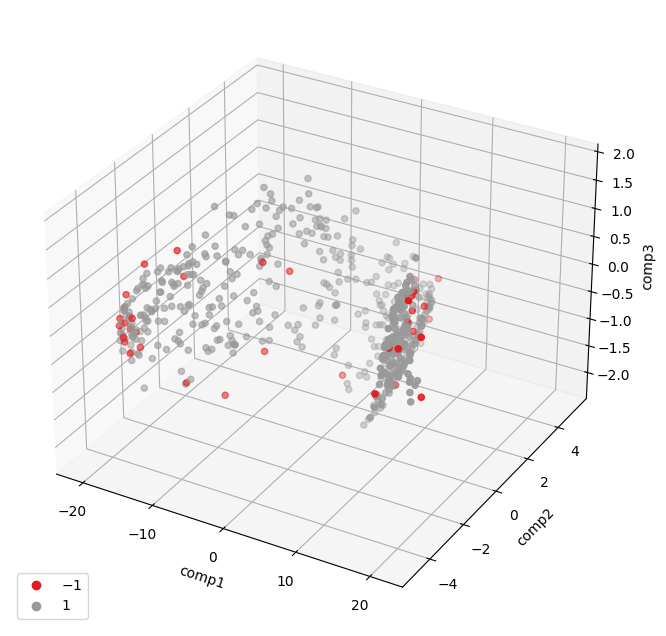

In [14]:
tsne = TSNE(perplexity=50, n_components=3).fit_transform(X) # TODO: é chegar a um valor de perplexity que mostre uma boa separação entre os grupos
tsne = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

X['outliers'] = np.where(density_scores < threshold, -1, 1)
tsne['outliers'] = Pipeline(steps).fit_predict(X)


fig = plt.figure(figsize=(8, 8))  # create a new figure
ax = fig.add_subplot(111, projection='3d')  # create a 3D subplot
scatter = ax.scatter(tsne['comp1'], tsne['comp2'], tsne['comp3'], c=tsne['outliers'], cmap='Set1')  # create 3D scatter plot

# add labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend(*scatter.legend_elements(), loc='lower left')

plt.show()  # display the plot

Has we can see, the GMM algorithm detected almost the same outliers detected by the LOF algorithm.

This is a good sign that the outliers detected are actually outliers.

We will now consider the outliers detected by this algorithm as the real outliers and remove them from the dataset.


In [15]:
df = df.drop(df[df['outliers'] < 0].index)
df = df.drop(['outliers'], axis = 1)

In [16]:
# # Threshold value to define the range for identifying outliers
# threshold = 3  # bigger the value, more the outliers are permitted --> 3 removes 25% of the data
# # 
# # # Loop through all columns in the DataFrame, excluding the diagnosis
# for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:
# 
#     # Mean and STD of the column
#     mean = df[column].mean()
#     std = df[column].std()
# 
#     # Lower and Upper limits
#     lower_limit = mean - threshold * std
#     upper_limit = mean + threshold * std
# 
#     # Remove outliers
#     df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
# 

Rows: 427 
Columns: 31

Removed 24.96% of the data


<Figure size 3000x3000 with 0 Axes>

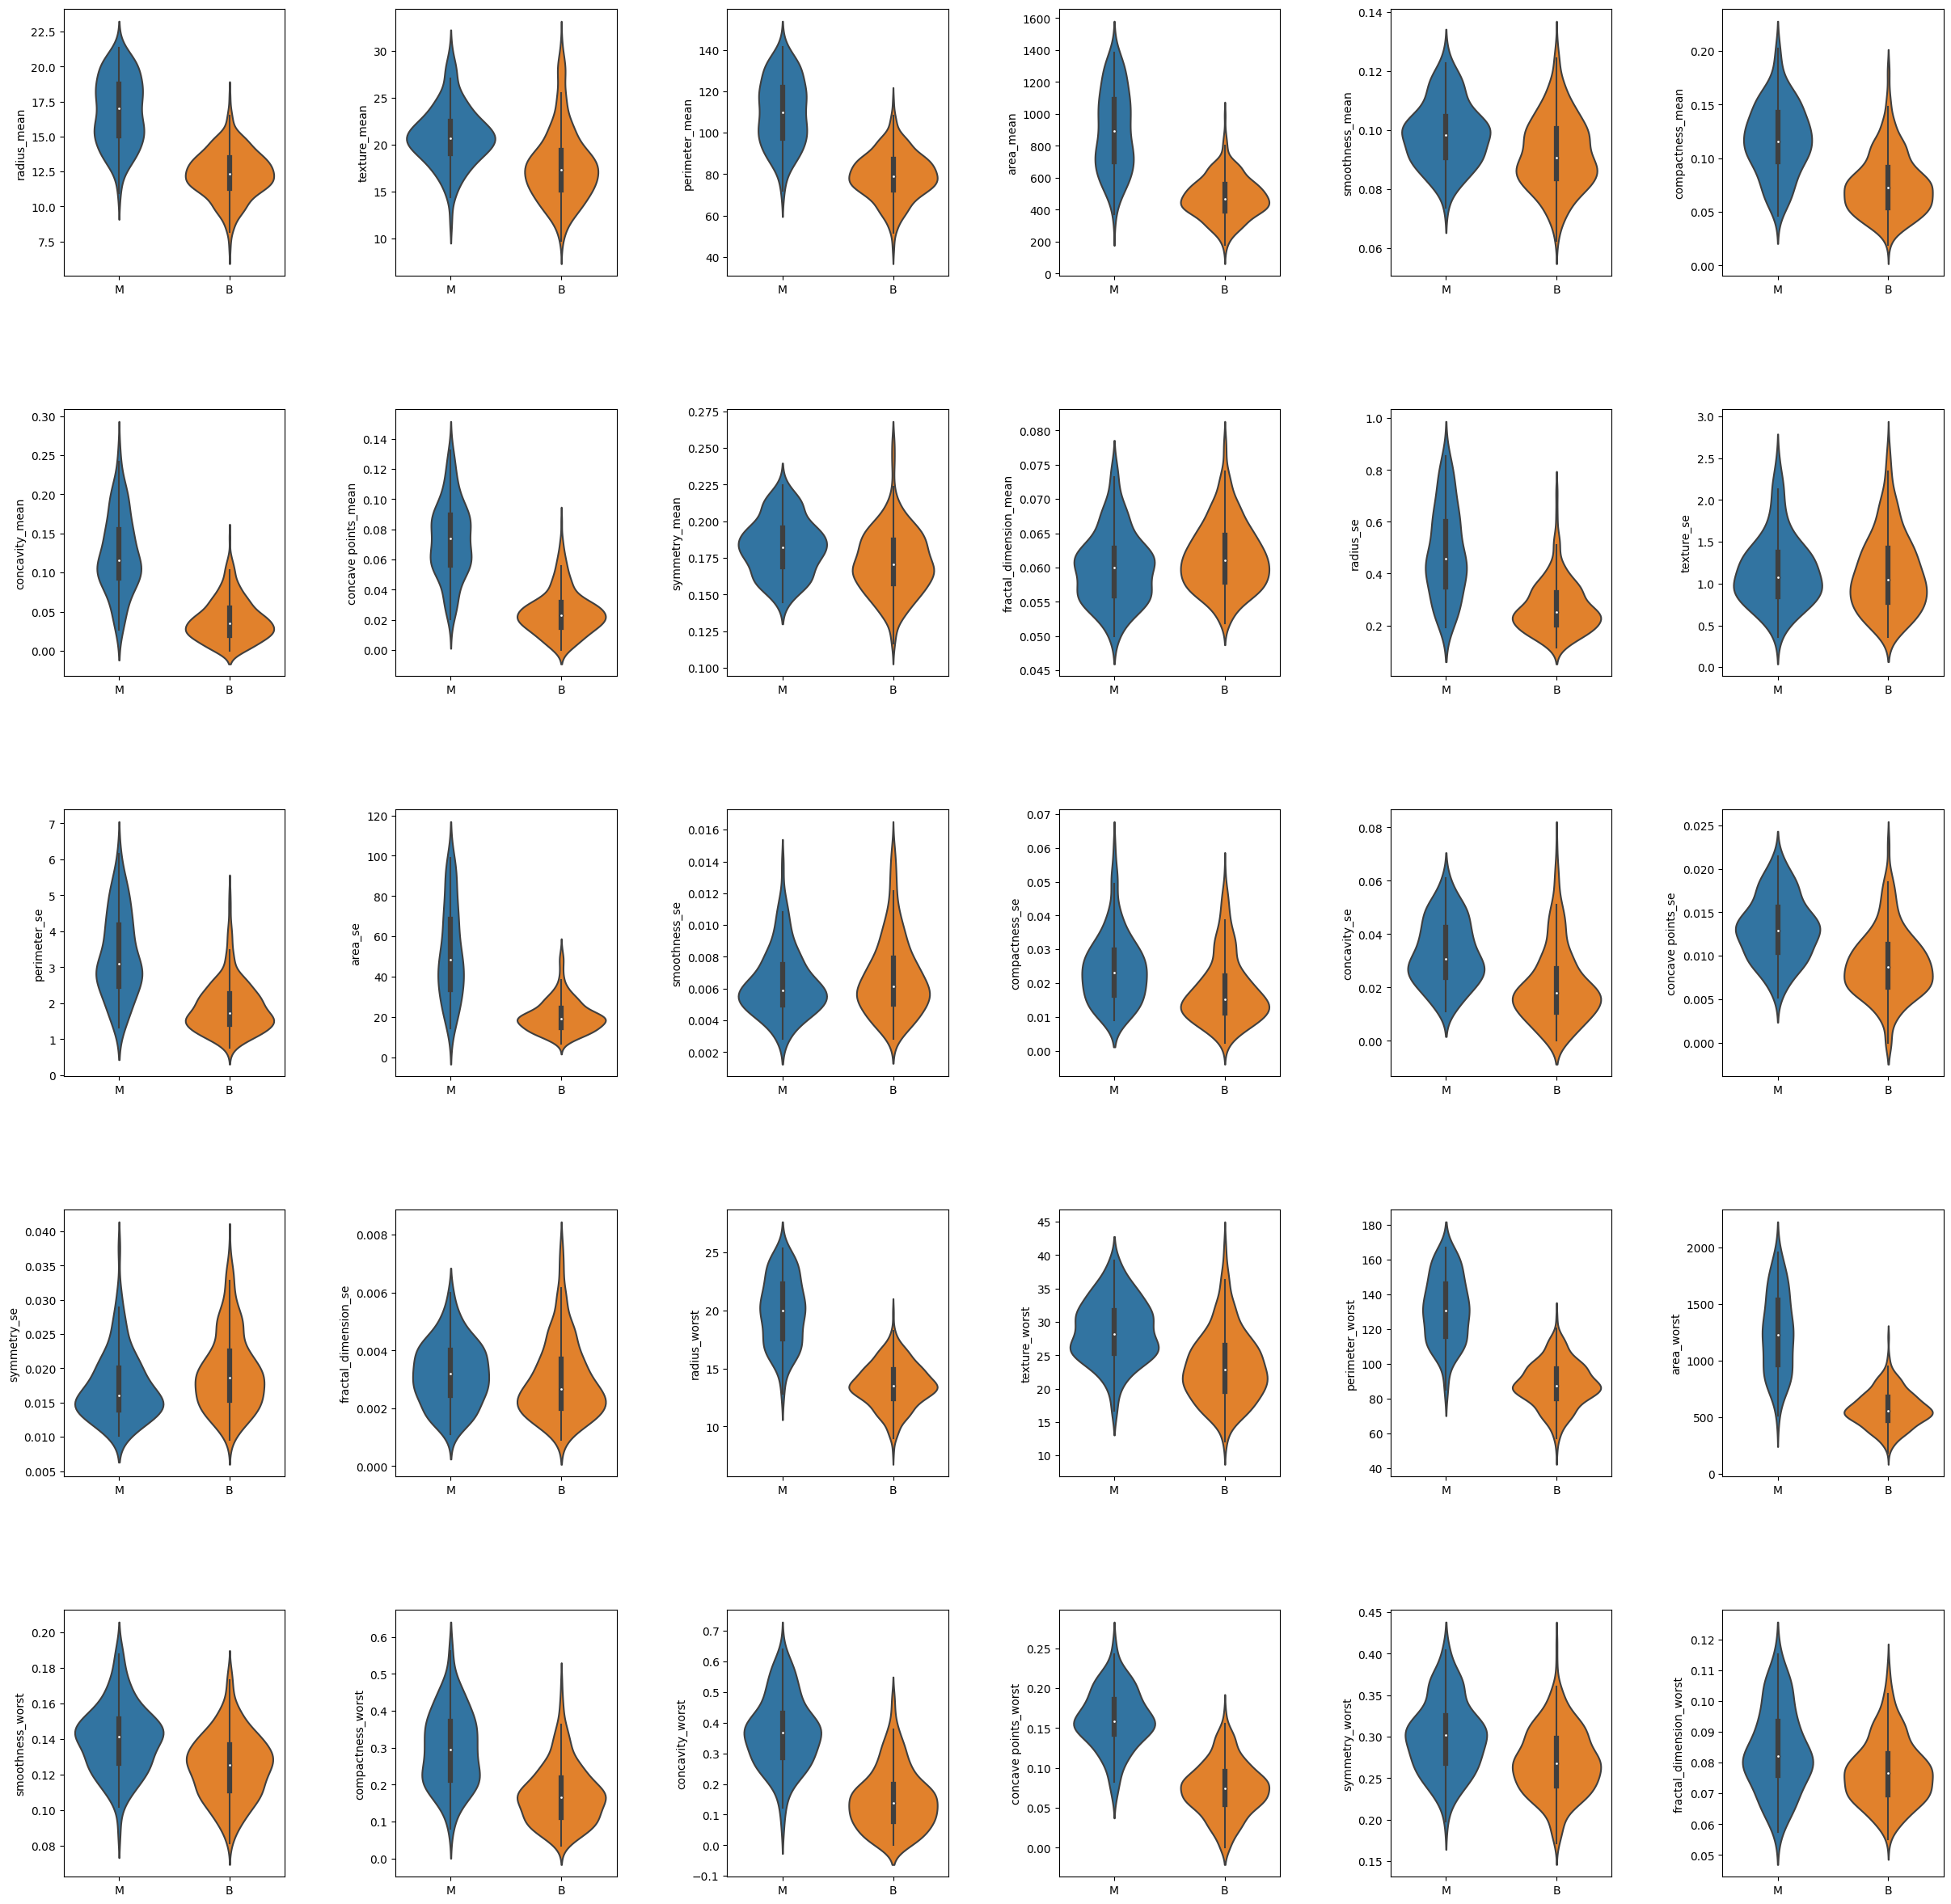

In [17]:
# Lets see the number of rows and columns after removing outliers
print( f'Rows: {df.shape[0]} \nColumns: {df.shape[1]}\n')
print(f'Removed {round((569 - df.shape[0]) / 569 * 100, 2)}% of the data')
violin_plt()

Now the data is free of outliers and the violin plots look much better.
We can see that the data is more balanced now.

In [18]:
# Save the cleaned dataset
df.to_csv('dataset_clean.csv', index=False)

We can now proceed to the next step: **Data Analysis**.

### 1.5. Data Analysis

Now that we have clean data, let's investigate further.

In [19]:
df = pandas.read_csv("dataset_clean.csv", index_col=None)

df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0         M        20.57         17.77           132.9     1326.0  \
1         M        19.69         21.25           130.0     1203.0   
2         M        20.29         14.34           135.1     1297.0   
3         M        18.25         19.98           119.6     1040.0   
4         M        13.71         20.83            90.2      577.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.08474           0.07864         0.08690              0.07017  \
1          0.10960           0.15990         0.19740              0.12790   
2          0.10030           0.13280         0.19800              0.10430   
3          0.09463           0.10900         0.11270              0.07400   
4          0.11890           0.16450         0.09366              0.05985   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0         0.1812  ...         24.99          23.41            158.8  \
1         0.2069  ...         23.57          25.53            152.5   
2         0.1809  ...         22.54          16.67            152.2   
3         0.1794  ...         22.88          27.66            153.2   
4         0.2196  ...         17.06          28.14            110.6   

   area_worst  smoothness_worst  compactness_worst  concavity_worst   
0      1956.0            0.1238             0.1866           0.2416  \
1      1709.0            0.1444             0.4245           0.4504   
2      1575.0            0.1374             0.2050           0.4000   
3      1606.0            0.1442             0.2576           0.3784   
4       897.0            0.1654             0.3682           0.2678   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.1860          0.2750                  0.08902  
1                0.2430          0.3613                  0.08758  
2                0.1625          0.2364                  0.07678  
3                0.1932          0.3063                  0.08368  
4                0.1556          0.3196                  0.11510  

[5 rows x 31 columns]

#### 1.5.1. Attribute Histograms

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ricar\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ricar\AppData\Local\Temp\ipykernel_20696\1436590364.py", line 1, in <module>
    df.hist(figsize=(20, 20), color='blue', edgecolor='black', alpha=0.4, bins=10, grid=False);
  File "c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_core.py", line 223, in hist_frame
    return plot_backend.hist_frame(
  File "c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\hist.py", line 518, in hist_frame
    fig, axes = create_subplots(
  File "c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py", line 300, in create_subplots
    handle_shared_axes(axarr, nplots, naxes, nrows, ncols, sharex, sharey)
  File "c:\Users\ricar\AppDat

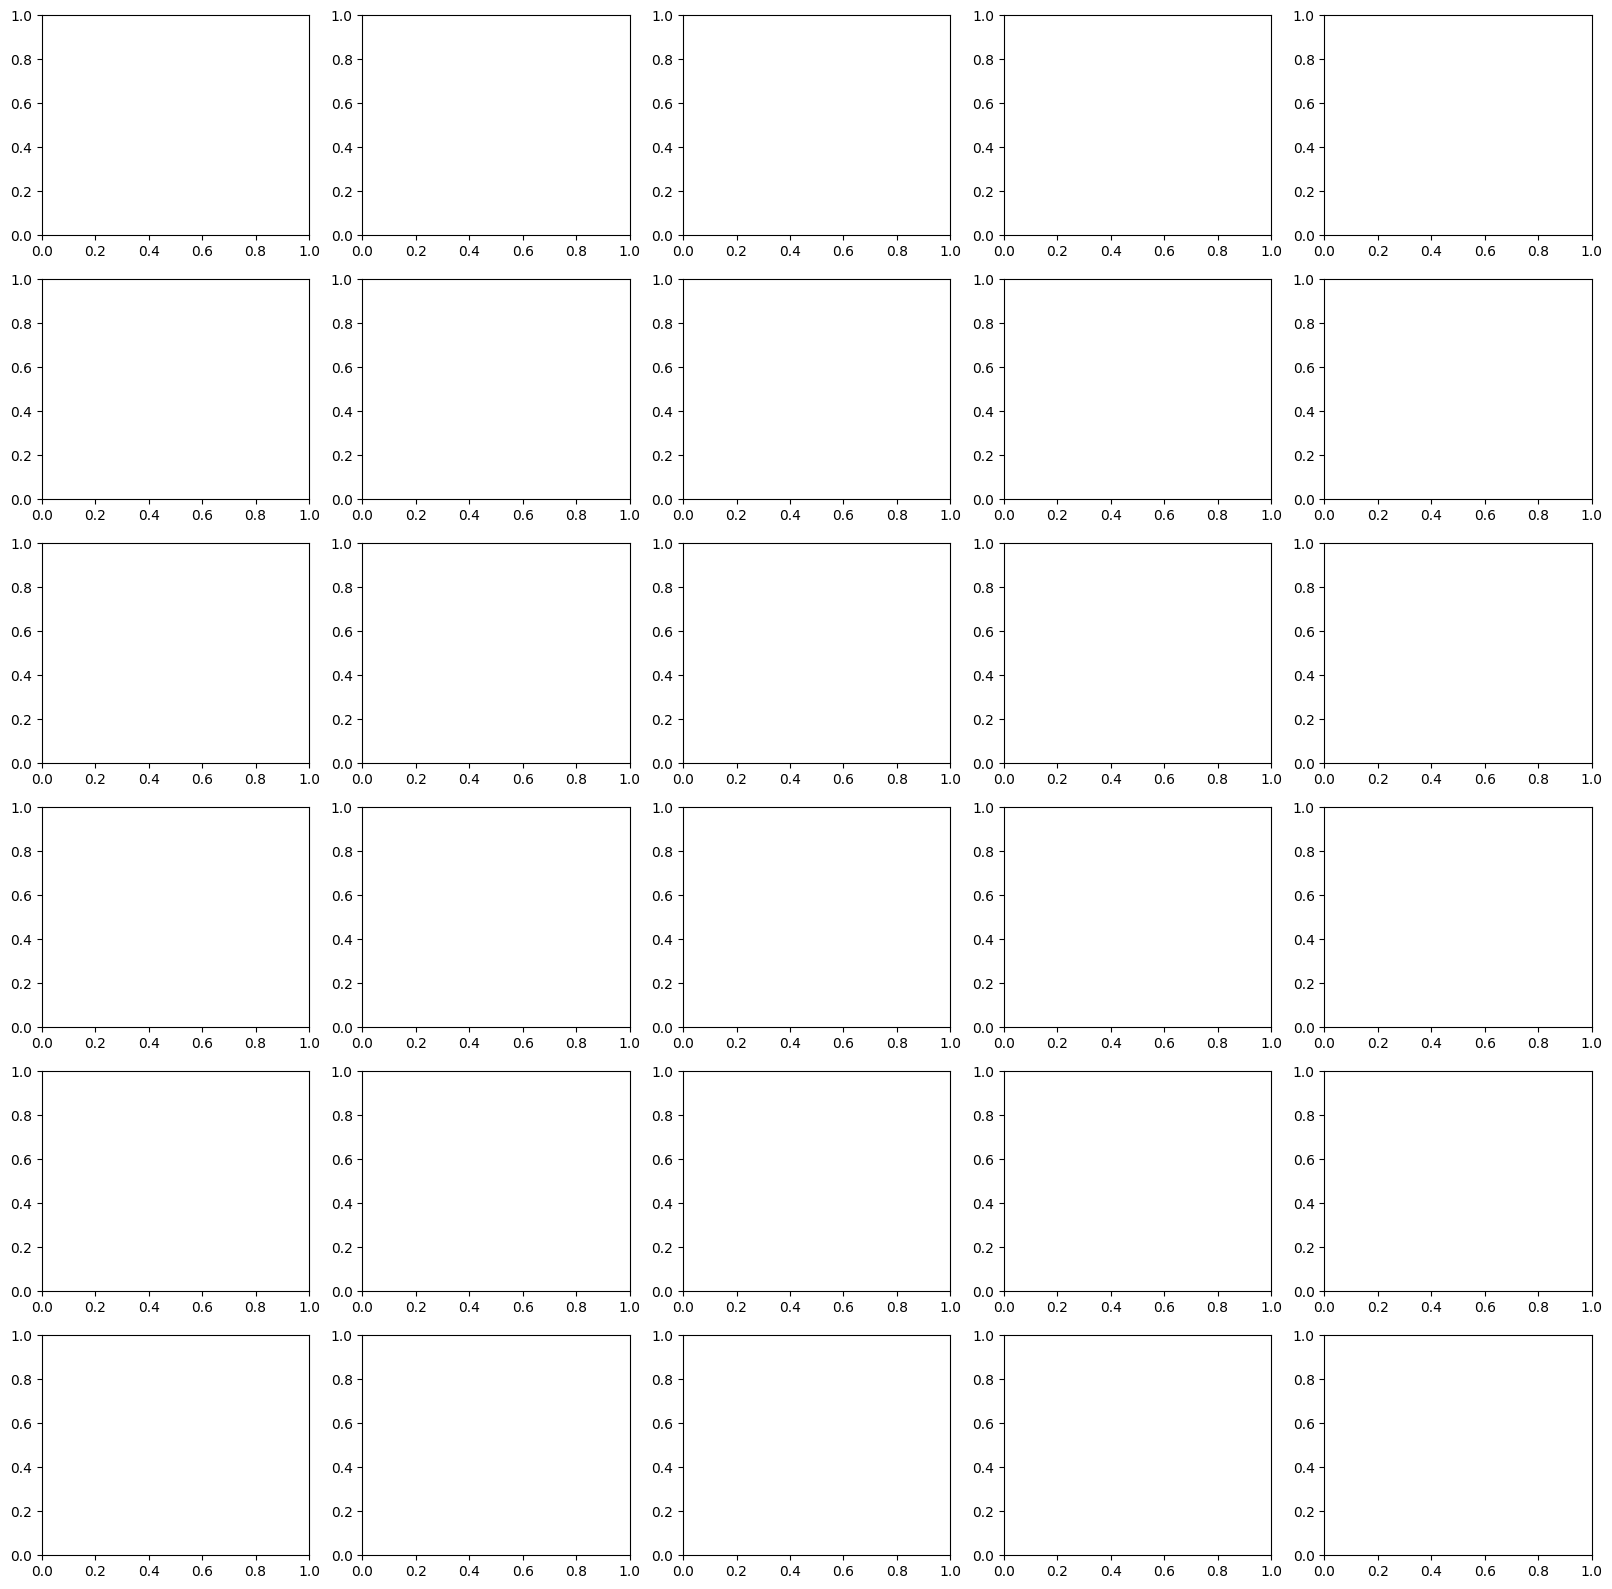

In [20]:
df.hist(figsize=(20, 20), color='blue', edgecolor='black', alpha=0.4, bins=10, grid=False);

The values seem to be normally distributed. This is good because it means that the data is not skewed.

#### 1.5.2. Correlation matrix

Let's take a look at the correlation between the attributes.

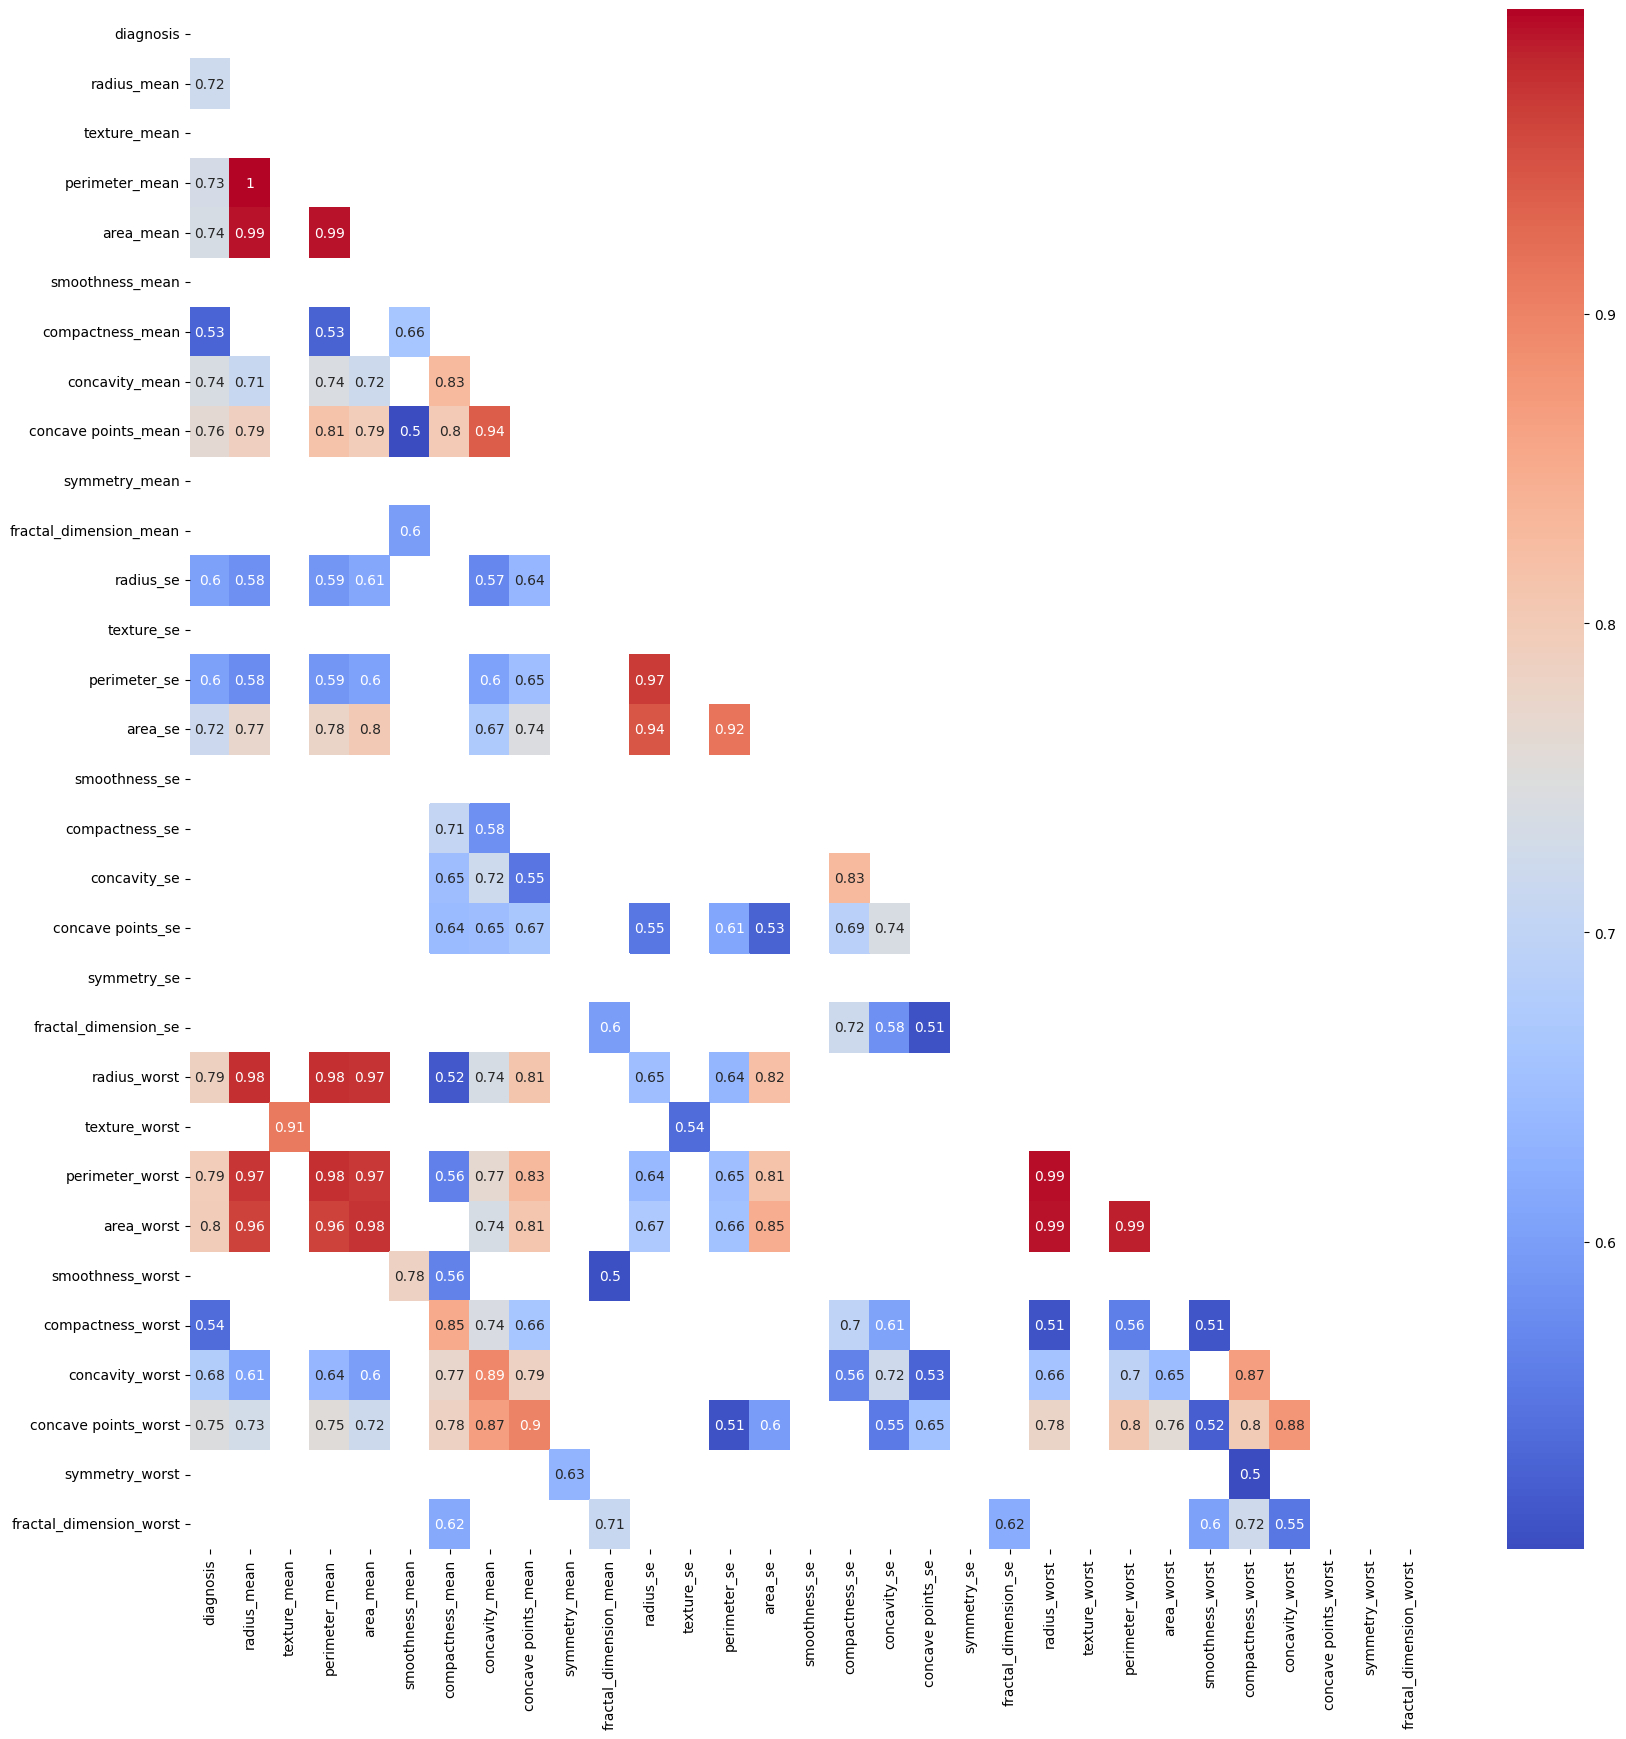

In [21]:
# calculate the correlation between each pair of columns
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1
corr_matrix = df.corr()

# Select only the columns with a correlation greater than 0.5 or less than -0.5
corr_matrix = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot onlly the lower triangle of the correlation matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 20))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, mask=mask)
plt.show()


df['diagnosis'] = df['diagnosis'].map({0 : 'B', 1 : 'M'}) # Swapping Back

The correlation matrix shows that there are some attributes that are highly correlated. This means that we can remove some of them without losing much information. We'll do that later.
Let's take a look at the correlation between the attributes and the target variable.

##### 1.5.2.1 Correlation between attributes and target variable

In [22]:
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1

# get the correlation between the diagnosis and each column
corr_matrix = df.corr()
print(corr_matrix['diagnosis'].sort_values(ascending=False))

df['diagnosis'] = df['diagnosis'].map({0 : 'B', 1 : 'M'}) # Swapping Back

diagnosis                  1.000000
area_worst                 0.796420
perimeter_worst            0.794675
radius_worst               0.787448
concave points_mean        0.764965
concave points_worst       0.746309
concavity_mean             0.739208
area_mean                  0.737194
perimeter_mean             0.733080
radius_mean                0.721529
area_se                    0.717007
concavity_worst            0.681057
radius_se                  0.603491
perimeter_se               0.602184
compactness_worst          0.535839
compactness_mean           0.528411
concave points_se          0.420743
texture_worst              0.416089
concavity_se               0.382714
texture_mean               0.357771
smoothness_worst           0.345563
symmetry_worst             0.313028
compactness_se             0.265689
fractal_dimension_worst    0.250812
smoothness_mean            0.244806
symmetry_mean              0.215077
fractal_dimension_se       0.077631
texture_se                 0

Ok, so there are some attributes that are highly correlated with the target variable and others that aren't. Let's take a look at them and see if we can remove some of them.

#### 1.5.3. Most valuable attributes (RFE - Recursive Feature Elimination)


With RFE we can see which attributes are the most important. We can then think about removing the less important ones.

In [23]:

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

df = pandas.read_csv("dataset_clean.csv", index_col=None)

df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Create the RFE object and rank each pixel
rfe = RFE(estimator=clf, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the feature importances
feature_importances = rfe.ranking_

best_features = []

# Print the name of the most important features
for index, feature in enumerate(feature_importances):
    if feature == 1:
        print(X.columns[index])
        best_features.append(X.columns[index])


texture_mean
concavity_mean
area_se
smoothness_se
radius_worst
texture_worst
smoothness_worst
concavity_worst
concave points_worst
symmetry_worst


So, these 10 attributes are the most important ones. We'll use them in the next step.

In [24]:
df = pandas.read_csv("dataset_clean.csv", index_col=None)

#### 1.5.4. Attribute Pairplots

We aleady saw the violin plots, let's now take a look at the pairplots.

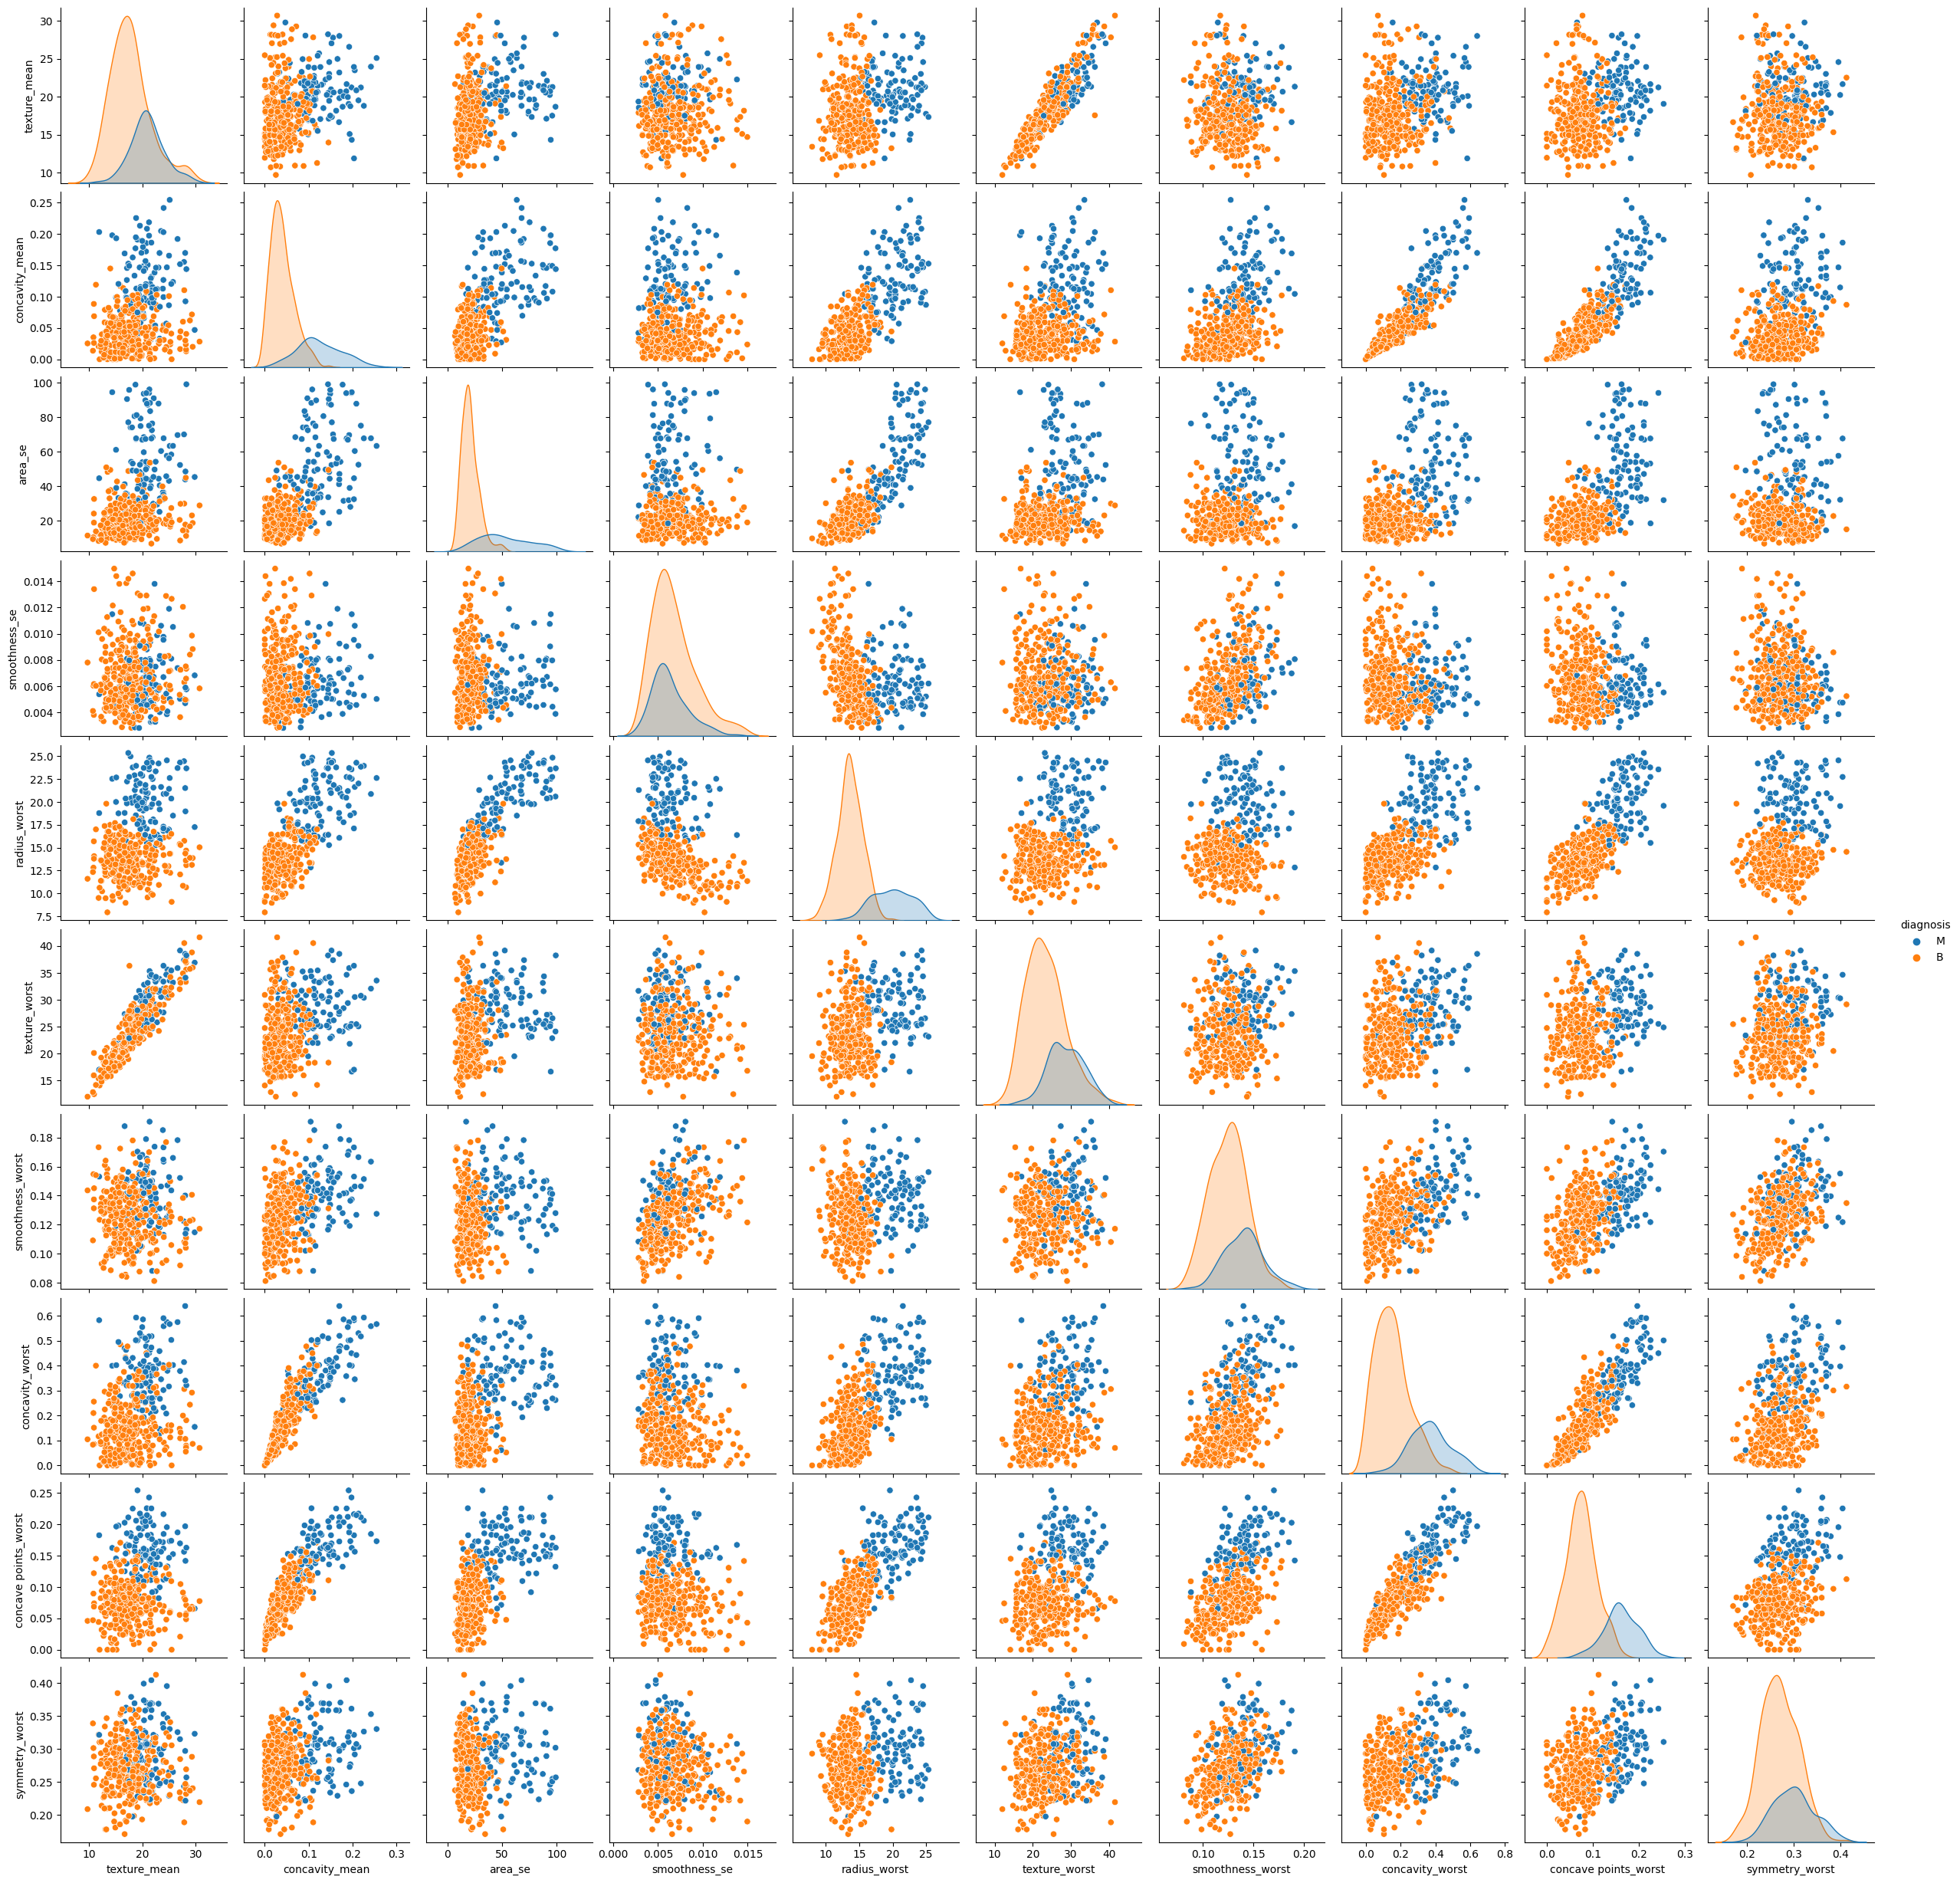

In [25]:
sb.pairplot(df, hue='diagnosis', vars=best_features);

We can see that the most important features are indeed the ones that have the highest correlation with the diagnosis. That is, the ones that allow for a better separation between the classes.
Let's take the clean dataset and just use the most important/correlated features to achieve better results with less computation required.

In [26]:
# keep only the best features in df
df = pandas.read_csv("dataset_clean.csv", index_col=None)
df = df[['diagnosis']+best_features]

df.head()

diagnosis  texture_mean  concavity_mean  area_se  smoothness_se   
0         M         17.77         0.08690    74.08       0.005225  \
1         M         21.25         0.19740    94.03       0.006150   
2         M         14.34         0.19800    94.44       0.011490   
3         M         19.98         0.11270    53.91       0.004314   
4         M         20.83         0.09366    50.96       0.008805   

   radius_worst  texture_worst  smoothness_worst  concavity_worst   
0         24.99          23.41            0.1238           0.2416  \
1         23.57          25.53            0.1444           0.4504   
2         22.54          16.67            0.1374           0.4000   
3         22.88          27.66            0.1442           0.3784   
4         17.06          28.14            0.1654           0.2678   

   concave points_worst  symmetry_worst  
0                0.1860          0.2750  
1                0.2430          0.3613  
2                0.1625          0.2364  
3                0.1932          0.3063  
4                0.1556          0.3196

## 2. Definition of the training and test sets

### 2.1. Splitting the dataset into the Training set and Test set & Feature Balancing

In [27]:
all_inputs = df.drop(['diagnosis'], axis=1).values
all_labels = df['diagnosis'].values

In [28]:
# Standardize the inputs

def standardize(inputs):
    return StandardScaler().fit_transform(inputs)

In [29]:
# Feature Balancing


# 1. Undersampling


def undersampling(all_inputs, all_labels, test_size, log=False):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(all_inputs, all_labels)
    if log:
        print("Number of malignant cases after undersampling: ",
              sum(y_resampled == 'M'))
        print("Number of benign cases after undersampling: ",
              sum(y_resampled == 'B'))
    return train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=1)


# 2. Oversampling


def oversampling(all_inputs, all_labels, test_size, log=False):
    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(all_inputs, all_labels)
    if log:
        print("Number of malignant cases after oversampling: ",
              sum(y_resampled == 'M'))
        print("Number of benign cases after oversampling: ",
              sum(y_resampled == 'B'))
    return train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=1)


# 3. SMOTE (Synthetic Minority Oversampling Technique)


def smote(all_inputs, all_labels, test_size, log=False):
    smote = SMOTE(random_state=0)
    X_resampled, y_resampled = smote.fit_resample(all_inputs, all_labels)
    if log:
        print("Number of malignant cases after smote: ", sum(y_resampled == 'M'))
        print("Number of benign cases after smote: ", sum(y_resampled == 'B'))
    return train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=1)

# They return (training_inputs, testing_inputs, training_classes, testing_classes)


def applySampling(samplingM, all_inputs, all_labels, test_size):

    if samplingM == 'oversampling':
        sampling = oversampling(all_inputs, all_labels, test_size)
    elif samplingM == 'undersampling':
        sampling = undersampling(all_inputs, all_labels, test_size)
    elif samplingM == 'smote':
        sampling = smote(all_inputs, all_labels, test_size)
    else:  # no sampling
        sampling = train_test_split(
            all_inputs, all_labels, test_size=test_size, random_state=1)

    return sampling


In [30]:
_ = undersampling(all_inputs, all_labels, 0.25, log=True)
_ = smote(all_inputs, all_labels, 0.25, log=True)
_ = oversampling(all_inputs, all_labels, 0.25, log=True)

Number of malignant cases after undersampling:  113
Number of benign cases after undersampling:  113
Number of malignant cases after smote:  314
Number of benign cases after smote:  314
Number of malignant cases after oversampling:  314
Number of benign cases after oversampling:  314


Undersampling leaves us with a balanced dataset but with much less data. Oversampling leaves us with a balanced dataset but with duplicated data. SMOTE creates synthetic data to balance the dataset.

Note that SMOTE generates synthetic samples by interpolating between existing minority class samples. This can lead to overfitting if not used carefully, so it's a good idea to experiment with different values for the sampling_strategy parameter of the SMOTE() constructor, which controls the ratio of minority to majority class samples in the resulting dataset.

## 3. Selection, Parameterization and Evaluation of the learning classification algorithms

In this step we'll try different classification algorithms and see which one performs better.
To avaliate the performance of the algorithms we'll use the following metrics:
    - Accuracy
    - Precision
    - Recall
    - F1 score

We'll also take a look at the confusion matrix to see how the algorithms are performing when it comes to classifying the data correctly.

We'll use cross validation to make sure that the results are not biased and we also worked with varied values for the parameters of the algorithms to see if we can improve the results. For efficiency reasons and to keep the notebook simple, we'll only show the results for the best parameters.

In [31]:

def analyze_performance(testing_inputs, testing_classes, model):
    testing_predictions = model.predict(testing_inputs)

    accuracy = accuracy_score(testing_classes, testing_predictions)
    precision = precision_score(
        testing_classes, testing_predictions, average='weighted')
    recall = recall_score(
        testing_classes, testing_predictions, average='weighted')
    f1 = f1_score(testing_classes, testing_predictions, average='weighted')

    def map_labels(label):
        if label == 'B':
            return 0
        elif label == 'M':
            return 1
        else:
            raise ValueError("Invalid label: {}".format(label))

    cm = conf_matrix(list(map(map_labels, testing_classes)),
                     list(map(map_labels, testing_predictions)))

    return accuracy, precision, recall, f1, cm


def display_results(accuracy_, precision_, recall_, f1_):
    print("=======================================")
    print("Accuracy: ", round(accuracy_*100, 3), "%")
    print("Precision: ", round(precision_*100, 3), "%")
    print("Recall: ", round(recall_*100, 3), "%")
    print("F1: ", round(f1_*100, 3), "%")
    print("=======================================")


def display_confusionMatrix(cm):
    classes = ['Benign', 'Malignant']
    plt.matshow(cm)
    plt.suptitle('Confusion matrix')
    total = sum(sum(cm))
    plt.title('Total cases: {}'.format(total))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            perc = round(cm[i, j] / total * 100, 1)
            plt.text(j, i, f"{format(cm[i, j], '.0f')} : {perc}%", horizontalalignment="center",
                     color="black" if cm[i, j] > cm.max() / 2 else "white")

    plt.show()

def evaluate_model(model_lambda):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    model = None
    cm = None

    # Iterate 20 times and get the average of the results
    for i in range(20):
        (accuracy_, precision_, recall_, f1_, cm), model = model_lambda()
        accuracy.append(accuracy_)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_)


    # Display the results and the confusion matrix for Decision Tree Classifier
    display_results(np.mean(accuracy), np.mean(
        precision), np.mean(recall), np.mean(f1))

    # Variance of the results
    print("Variance of accuracy: ", round(np.var(accuracy), 5))
    print("Variance of precision: ", round(np.var(precision), 5))
    print("Variance of recall: ", round(np.var(recall), 5))
    print("Variance of f1: ", round(np.var(f1), 5))

    # Display one of the models and the confusion matrix (they are all preety much the same)
    print(model)
    display_confusionMatrix(cm)

    return model


### 3.1. Decision Trees

In [32]:
# Define the Decision Tree Classifier Model

def dtc(all_inputs, all_labels, samplingM,  nFolds=10, test_size=0.25, standardizeInputs=True):

    dtc = tree.DecisionTreeClassifier()

    parameter_grid = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'max_depth': [1, 2, 3, 4, 5],
                      'max_features': [1, 2, 3, 4]}

    (training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
        samplingM, all_inputs, all_labels, test_size)

    if standardizeInputs:
        training_inputs = standardize(training_inputs)
        testing_inputs = standardize(testing_inputs)

    # Create the cross-validation folds
    cross_validation = StratifiedKFold(n_splits=nFolds)

    grid_dtc = GridSearchCV(
        dtc, param_grid=parameter_grid, cv=cross_validation)

    # Train the classifier
    grid_dtc.fit(training_inputs, training_classes)

    # Store best classifier
    best_dtc = grid_dtc.best_estimator_

    # Analyze the accuracy, precision, recall and f-measure achieveed.
    return analyze_performance(testing_inputs, testing_classes, best_dtc), best_dtc


Accuracy:  96.338 %
Precision:  96.392 %
Recall:  96.338 %
F1:  96.335 %
Variance of accuracy:  0.00026
Variance of precision:  0.00025
Variance of recall:  0.00026
Variance of f1:  0.00026
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3)


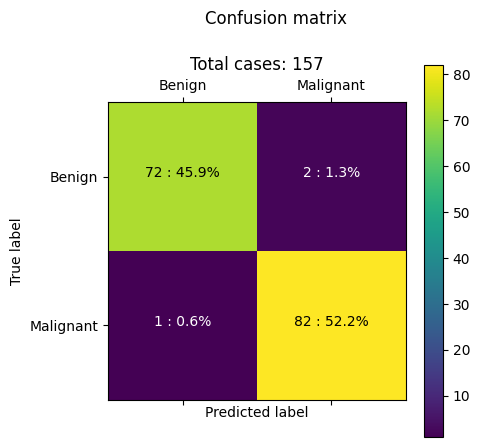

In [33]:
# Get the results for Decision Tree Classifier Model with better parameters found in our testings

model = evaluate_model(lambda: dtc(all_inputs, all_labels, 'oversampling',  test_size=0.25, standardizeInputs=False, nFolds=12))


After much fine tuning and by using the best found parameters, the Decision Tree model achieves consistently an accuracy of around 96% with a similar precision, recall and F1 for both classes.
Looking at the confusion matrix, we can see that the model misclassified a very small amount of samples. This is not good because it means that some patients will not be diagnosed correctly. However, taking a closer look, we can see that there are fewer false negatives (almost non-existent) than false positives. That is good because it's better to tell a healthy person that he has cancer and end up being nothing than to tell a sick person that he doesn't have cancer.

Let's see the tree generated.

In [34]:
# Generate a visualization of the tree
tree.export_graphviz(model, out_file='tree.dot', feature_names=best_features)

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) # requires Linux package graphviz

# Display in jupyter notebook
Image(filename='tree.png', width=1800, height=1800)

The Decision Tree algorithm got a pretty good score! Can we make better with another kind of classifier?

We'll be trying many different classifiers and comparing their results in the end.

### 3.2. Neural Networks

In [35]:
# Define Neural Network Model

def nn(all_inputs, all_labels, samplingM,  nFolds=10, test_size=0.25, standardizeInputs=True, fast=True):

    # suppress the ConvergenceWarning from the MLPClassifier
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    clf = MLPClassifier()

    # This parameter grid took a lot of time to run (1h30m +), so we decided to not use any parameters for the fast version
    parameter_grid = {
        'activation': ['tanh', 'relu'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [100, 200, 300],
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'early_stopping': [True, False]
    }

    if fast:
        parameter_grid = {}  # TODO: GET BEST CONFIGURATION

    (training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
        samplingM, all_inputs, all_labels, test_size)

    if standardizeInputs:
        training_inputs = standardize(training_inputs)
        testing_inputs = standardize(testing_inputs)

    # Create the cross-validation folds
    cross_validation = StratifiedKFold(n_splits=nFolds)

    grid_search = GridSearchCV(
        clf, param_grid=parameter_grid, cv=cross_validation)

    # Train the classifier
    grid_search.fit(training_inputs, training_classes)

    # Store best classifier
    best_model = grid_search.best_estimator_

    # Analyze the accuracy, precision, recall and f-measure achieveed.
    return analyze_performance(testing_inputs, testing_classes, best_model), best_model


Accuracy:  97.452 %
Precision:  97.469 %
Recall:  97.452 %
F1:  97.453 %
Variance of accuracy:  3e-05
Variance of precision:  3e-05
Variance of recall:  3e-05
Variance of f1:  3e-05
MLPClassifier()


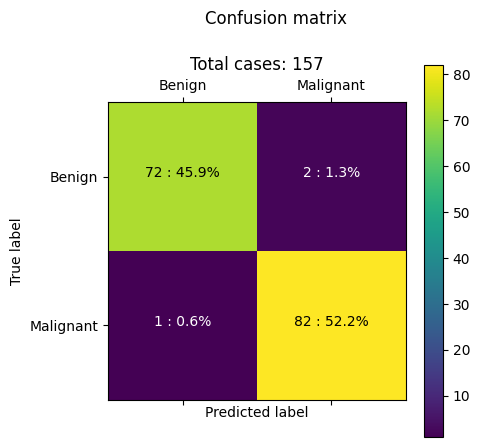

In [36]:
# Get the results for Neural Network Model with better parameters found in our testings

model = evaluate_model(lambda: nn(all_inputs, all_labels, 'oversampling', nFolds=12, test_size=0.25, standardizeInputs=True))


This model takes a lot longer to train but the results are better than the ones achieved with the Decision Tree model. The accuracy is around 97-99% (which is great) with a similar precision, recall and F1 for both classes. The Neural Network has a lot of parameters that can be tuned, but they take a long time to train and don't improve the results by much as the dataset we have is not very large nor complex. We opted not to use any parameters.


Furthermore, the variance is lower, meaning the model is also more consistent.
The most important thing we noticed is that Neural Networks are much more sensitive to the data. That is, if we use the original dataset (without removing outliers and balancing the data) the results are much worse. This means that we need to be careful when using Neural Networks because they can be very sensitive to the data. Moreover, standardization is also very important when using Neural Networks, which is not the case with Decision Trees.

### 3.3. K-Nearest Neighbors

In [37]:
# Define K-Nearest Neighbors Model

def knn(all_inputs, all_labels, samplingM,  nFolds=10, test_size=0.25, standardizeInputs=True, fast=True):
    knn = KNeighborsClassifier()

    parameter_grid = {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30, 40, 50],
        'p': [1, 2],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    }

    if fast:
        parameter_grid = {'leaf_size': [10], 'metric': ['euclidean'], 'n_neighbors': [8], 'p': [1],
                          'weights': ['distance']}

    (training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
        samplingM, all_inputs, all_labels, test_size)

    if standardizeInputs:
        training_inputs = standardize(training_inputs)
        testing_inputs = standardize(testing_inputs)

    cross_validation = StratifiedKFold(n_splits=nFolds)

    grid_search = GridSearchCV(knn,
                               param_grid=parameter_grid,
                               cv=cross_validation)

    # Train the classifier
    grid_search.fit(training_inputs, training_classes)

    # Store best classifier
    best_model = grid_search.best_estimator_

    # Analyze the accuracy, precision, recall and f-measure achieveed.
    return analyze_performance(testing_inputs, testing_classes, best_model), best_model


Accuracy:  98.089 %
Precision:  98.098 %
Recall:  98.089 %
F1:  98.09 %
Variance of accuracy:  0.0
Variance of precision:  0.0
Variance of recall:  0.0
Variance of f1:  0.0
KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=8, p=1,
                     weights='distance')


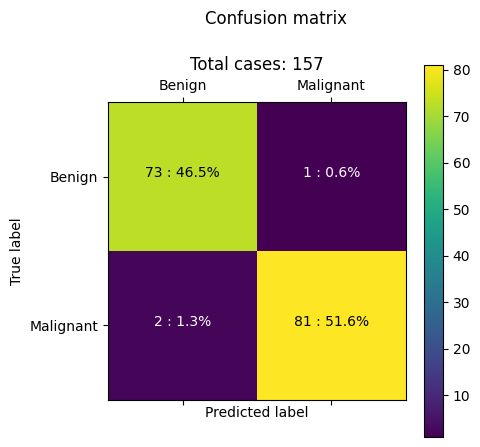

In [38]:
# Get the results for K-Nearest Neighbors Model with better parameters found in our testings

model = evaluate_model(lambda: knn(all_inputs, all_labels, 'oversampling', nFolds=8, test_size=0.25, standardizeInputs=True))

The results are similar to the ones achieved with the Neural Network model but its much faster to train! The accuracy is around 97-98% with a similar precision, recall and F1 for both classes. The variance for all these values is also very low, hinting at the model's stability. Once again, there are a lot of parameters that can be tuned, so we use the best ones found after much fine tuning using the 'fast' option.
It's also relevant to mention that the number of folds doesn't change much but input normalization does (without normalization the results are 2-3% worse). The test size also doesn't change much, but the results are slightly better with a test size of 0.25 (1% change).

### 3.4. Support Vector Machines (SVM)

In [39]:
# Define Support Vector Machine Model

def support_vm(all_inputs, all_labels, samplingM,  nFolds=10, test_size=0.25, standardizeInputs=True, fast=True):

    svm = SVC()

    parameter_grid = {'C': [0.1, 1, 10, 100, 1000],
                      'gamma': [1e-3, 1e-4, 1, 0.1, 0.01, 0.001, 0.0001],
                      'kernel': ['rbf', 'linear']}

    if fast:
        parameter_grid = {'C': [1], 'gamma': [0.1], 'kernel': ['linear']}

    (training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
        samplingM, all_inputs, all_labels, test_size)

    if standardizeInputs:
        training_inputs = standardize(training_inputs)
        testing_inputs = standardize(testing_inputs)

    cross_validation = StratifiedKFold(n_splits=nFolds)

    grid_search = GridSearchCV(svm,
                               param_grid=parameter_grid,
                               cv=cross_validation)

    # Train the classifier
    grid_search.fit(training_inputs, training_classes)

    # Store best classifier
    best_model = grid_search.best_estimator_

    # Analyze the accuracy, precision, recall and f-measure achieveed.
    return analyze_performance(testing_inputs, testing_classes, best_model), best_model


Accuracy:  98.726 %
Precision:  98.726 %
Recall:  98.726 %
F1:  98.726 %
Variance of accuracy:  0.0
Variance of precision:  0.0
Variance of recall:  0.0
Variance of f1:  0.0
SVC(C=1, gamma=0.1, kernel='linear')


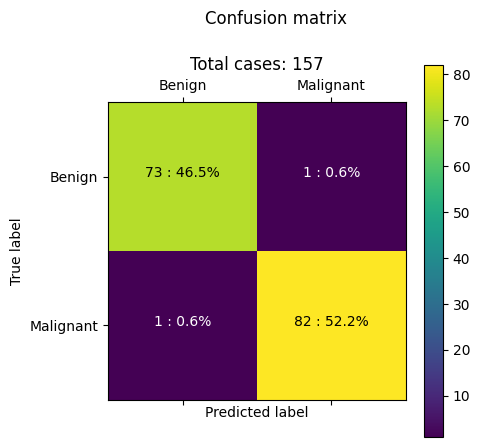

In [40]:
# Get the results for SVM Model with better parameters found in our testings

model = evaluate_model(lambda: support_vm(all_inputs, all_labels, 'oversampling', nFolds=15, test_size=0.25, standardizeInputs=True))

Like in the previous models, we get very good results. In this case we got 98-99% which is the beast we got so far. The precision, recall and F1 for both classes are also very good. The variance is also very low, meaning the model is also very consistent. The input normalization is once again important to achieve a 2-3% better ayccuracy score. Another thing to notice: normalized inputs are very quick to train, while non-normalized inputs take a lot longer. This happens because the algorithm converges much faster with normalized inputs.

Accuracy:  100.0 %
Precision:  100.0 %
Recall:  100.0 %
F1:  100.0 %
Variance of accuracy:  0.0
Variance of precision:  0.0
Variance of recall:  0.0
Variance of f1:  0.0
SVC(C=1, gamma=0.1, kernel='linear')


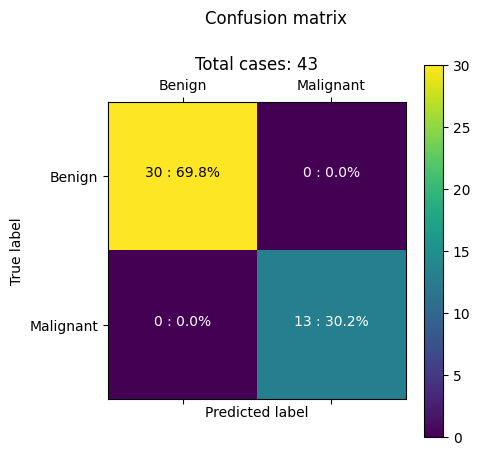

In [41]:
# Get the results for SVM Model with better parameters found in our testings

model = evaluate_model(lambda: support_vm(all_inputs, all_labels, '', nFolds=12, test_size=0.10, standardizeInputs=True))

Without data balancing and by reducing the test size, we can achieve ~100% accuracy. However, this is not a good thing because it means that the model is overfitting the data and  will not generalize well to new data. We want a model that can generalize well to new data, so we'll stick with the previous results.

### 3.5. Random Forest

In [42]:
# Define Random Forest Model

# TODO: lia --> copia o modelo dos de cima e vai testando valores nos argumentos e grid_parameter diferentes, depois faz o fast=True

def random_forest(all_inputs, all_labels, samplingM,  nFolds=10, test_size=0.25, standardizeInputs=True, fast=True):

    rf = RandomForestClassifier()
    pass

In [43]:
# Get the results for Random Forest Model with better parameters found in our testings

# model = evaluate_model(lambda: random_forest(all_inputs, all_labels, 'oversampling', nFolds=5, test_size=0.25, standardizeInputs=False))

todo: resultados lia

### 3.6. Logistic Regression

In [44]:
# Define Logistic Regression Model

def logical_reg(all_inputs, all_labels, samplingM,  nFolds=10, test_size=0.25, standardizeInputs=True, fast=True):

    clf = LogisticRegression()

    parameter_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                      'penalty': ['l2'],
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [100, 200, 300]}

    if fast:
        parameter_grid = {}  # TODO: GET BEST CONFIGURATION

    (training_inputs, testing_inputs, training_classes, testing_classes) = applySampling(
        samplingM, all_inputs, all_labels, test_size)

    if standardizeInputs:
        training_inputs = standardize(training_inputs)
        testing_inputs = standardize(testing_inputs)

    cross_validation = StratifiedKFold(n_splits=nFolds)

    grid_search = GridSearchCV(clf,
                               param_grid=parameter_grid,
                               cv=cross_validation)

    # Train the classifier
    grid_search.fit(training_inputs, training_classes)

    # Store best classifier
    best_model = grid_search.best_estimator_

    # Analyze the accuracy, precision, recall and f-measure achieveed.
    return analyze_performance(testing_inputs, testing_classes, best_model), best_model


Accuracy:  98.726 %
Precision:  98.726 %
Recall:  98.726 %
F1:  98.726 %
Variance of accuracy:  0.0
Variance of precision:  0.0
Variance of recall:  0.0
Variance of f1:  0.0
LogisticRegression(C=0.1, solver='liblinear')


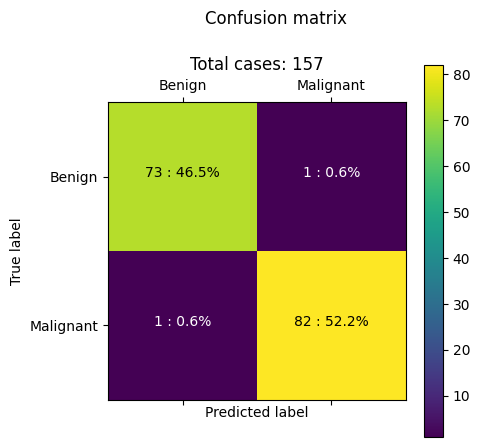

In [45]:
# Get the results for Logistic Regression Model with better parameters found in our testings

model = evaluate_model(lambda: logical_reg(all_inputs, all_labels, 'oversampling', nFolds=10, test_size=0.25, standardizeInputs=True, fast=False))

Finaly, this model is very similar to the previous ones. We achieve 98-99% score in all metrics with very low variance. The input normalization is once again important to achieve a 2-3% better ayccuracy score.

## 4. Comparison of the results

TODO: FINAL RESULTS